### LGM VIRTUAL INTERNSHIP PROGRAM 
### DATA SCIENCE 
### ADVANCE LEVEL TASK 1 :Develop A Neural Network That Can Read Handwriting

In [2]:
#importing libraries
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow

In [3]:
#extracting the mnist dataset through keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical,plot_model

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [5]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
#One hot encoding the target variable for train dataset
y_train=to_categorical(y_train,num_classes=10)

In [7]:
#One hot encoding the target variable for test dataset
y_test=to_categorical(y_test,num_classes=10)

In [8]:
#Normalizing the dataset
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train=tensorflow.expand_dims(x_train,axis=3)
x_test=tensorflow.expand_dims(x_test,axis=3)

In [13]:
x_train[1].shape,x_test.shape

(TensorShape([28, 28, 1]), TensorShape([10000, 28, 28, 1]))

### Dataset

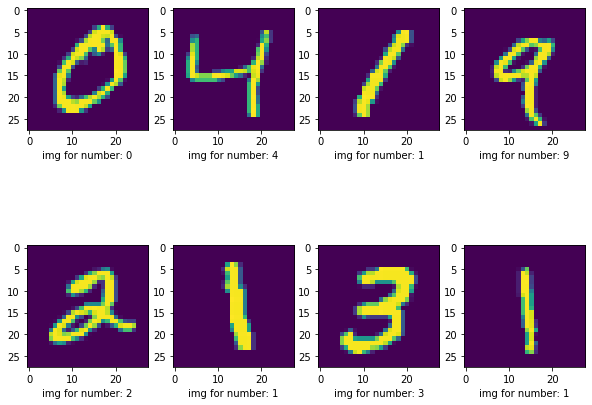

In [10]:

plt.figure(figsize=(10,8))
for i in range(1,9):
    random_num=np.random.randint(0,60000)
    plt.subplot(2,4,i)
    plt.imshow(x_train[i])
    plt.xlabel("img for number: " +str(np.argmax(y_train[i])))
plt.show()


## Building a CNN model that can read Handwriting

### A Convolutional Neural Network (CNN) is a type of Deep Learning neural network architecture commonly used in Computer Vision. Computer vision is a field of Artificial Intelligence that enables a computer to understand and interpret the image or visual data. 

#### Convolutional Neural Network consists of multiple layers like the input layer, Convolutional layer, Pooling layer, and fully connected layers. 

#### The Convolutional layer applies filters to the input image to extract features.

#### Pooling layer downsamples the image to reduce computation.

#### Fully connected layer makes the final prediction.

### The network learns the optimal filters through backpropagation and gradient descent.

In [11]:
model=Sequential([
    Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)),
    MaxPool2D((2,2),strides=2,padding='valid'),
    Dropout(0.4),
    BatchNormalization(),
    Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)),
    MaxPool2D((2,2),strides=2,padding='valid'),
    Dropout(0.4),
    BatchNormalization(),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0

In [17]:
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
#Training the model
model.fit(x_train, y_train, epochs=5,validation_data=(x_test,y_test),validation_batch_size=50,batch_size=200)

Epoch 1/5
300/300 [==============================] - 59s 195ms/step - loss: 0.2722 - accuracy: 0.9146 - val_loss: 10.8410 - val_accuracy: 0.1135
Epoch 2/5
300/300 [==============================] - 60s 201ms/step - loss: 0.0872 - accuracy: 0.9735 - val_loss: 0.1962 - val_accuracy: 0.9386
Epoch 3/5
300/300 [==============================] - 63s 210ms/step - loss: 0.0685 - accuracy: 0.9789 - val_loss: 0.0340 - val_accuracy: 0.9897
Epoch 4/5
300/300 [==============================] - 60s 202ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0382 - val_accuracy: 0.9878
Epoch 5/5
300/300 [==============================] - 61s 205ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0298 - val_accuracy: 0.9912


## Predicting using our CNN Model

In [95]:
np.argmax(model.predict(x_test)[0]),y_test[0]

313/313 [==============================] - 3s 10ms/step


(7, array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [21]:
y_pred=model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


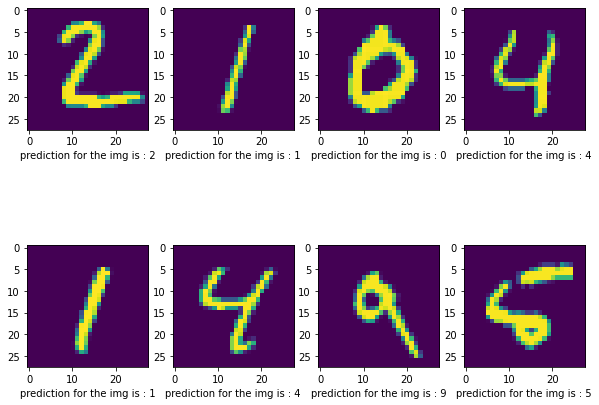

In [64]:

plt.figure(figsize=(10,8))
for i in range(1,9):
    random_num=np.random.randint(0,10000)
    plt.subplot(2,4,i)
    plt.imshow(x_test[i])
    plt.xlabel("prediction for the img is : " +str(y_pred[i]) )
plt.show()


## Model Evaluation

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [22]:
y_true,y_pred=[np.argmax(i) for i in y_test],[np.argmax(i) for i in y_pred]

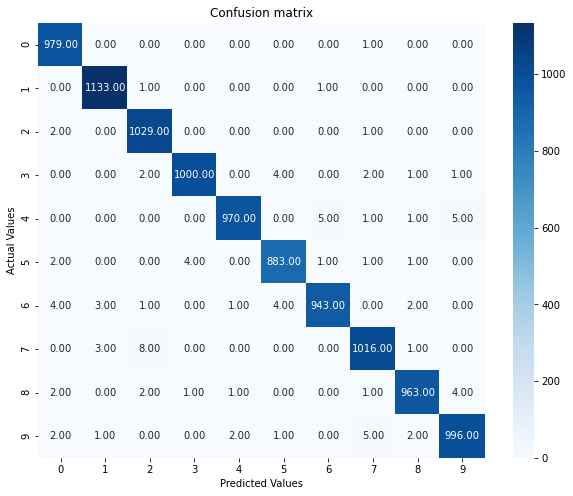

In [23]:
#Confusion Matrix
cm = confusion_matrix(y_true,y_pred)
labels = list(np.unique(y_true))
plt.figure(figsize=(10, 8))
sns.heatmap(cm,cmap='Blues', annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Confusion matrix")
plt.show()


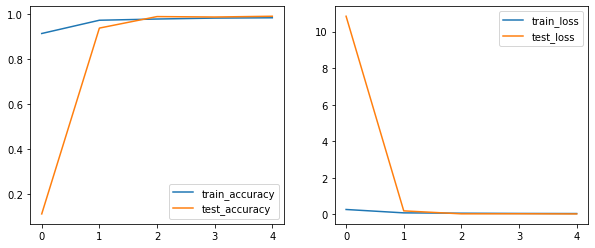

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train_accuracy','test_accuracy'])

plt.subplot(1,2,2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train_loss','test_loss'])

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

